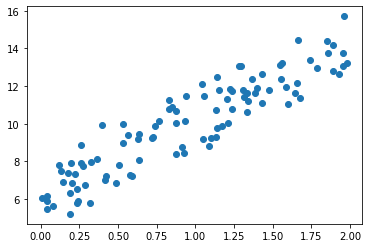

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X +6 식을 근사(w1 = 4, w0=6), random 값은 NOISE를 위해 만듦
X = 2*np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

plt.scatter(X,y)

In [5]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01) :
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계싼하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 내적으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0를 업데이트 할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000) :
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여
    # w1, w0 업데이트 수행
    for ind in range(iters) :
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


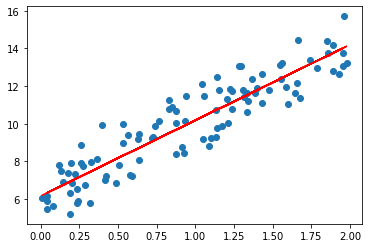

In [6]:
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N  # 오차값
    return cost
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print(f"w1:{w1[0,0]:.3f} w0:{w0[0,0]:.3f}")
y_pred = w1[0,0]*X + w0
print(f"Gradient Descent Total Cost:{get_cost(y, y_pred):.4f}")
plt.scatter(X, y)
plt.plot(X, y_pred, c="r")

w1:4.022 w0:6.162
RSS(MSE):0.8502


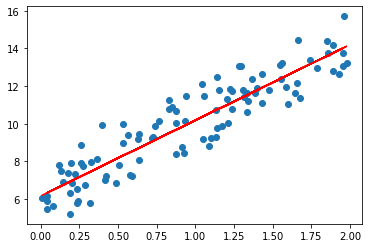

In [7]:
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.abs(y - y_pred))/N  # 오차값
    return cost
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print(f"w1:{w1[0,0]:.3f} w0:{w0[0,0]:.3f}")
y_pred = w1[0,0]*X + w0
print(f"RSS(MSE):{get_cost(y, y_pred):.4f}")
plt.scatter(X, y)
plt.plot(X, y_pred, c="r")

In [14]:
def stochastic_gradient_descent_steps(x,y,batch_size = 10 , iters = 1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index= 0

  for ind in range(iters):
      np.random.seed(ind)
      
      stochastic_random_index = np.random.permutation(X.shape[0])
      sample_X = X[stochastic_random_index[0:batch_size]]
      sampel_y = y[stochastic_random_index[0:batch_size]]


      w1_update, w0_update = get_weight_updates(w1, w0, sample_X , sampel_y , learning_rate=0.01)
      w1 = w1 - w1_update
      w0 = w0 - w0_update
  return w1, w0

In [15]:
np.random.permutation(X.shape[0])

array([53, 70, 30, 34, 84,  7, 62, 27, 52, 86, 56, 55, 59, 93, 51, 94, 22,
       49, 39, 58,  3, 74, 99, 73, 40, 57, 76, 45, 64, 32, 43, 33, 92, 68,
       82, 18, 71, 90, 60, 17, 63, 38, 36, 28, 46, 96, 54, 88, 21, 20, 98,
       24, 29, 47, 75,  0, 42, 97, 26, 65, 41, 44, 78, 15, 10, 87, 91, 31,
       13,  9, 81, 67, 19, 14, 72,  5, 50, 25,  8, 95, 61, 77, 69, 85, 23,
       16, 48, 80, 83, 66,  2, 79, 11, 89, 37,  6,  1,  4, 12, 35])

In [18]:
w1, w0 = stochastic_gradient_descent_steps(X,y,iters = 1000)
print("w1:", round(w1[0,0],3), "w0:", round(w0[0,0],3))
y_pred = w1[0,0]*X +w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.8503
